In [18]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

In [2]:
# Loading data
machine_data = pd.read_csv(r"C:\Users\Lenovo\Desktop\Tasks\Tasks\task1\data\machine_logs.csv")

machine_data.head()

,timestamp,machine_id,sensor_temp_c,vibration_mm_s,status_code
0,2025-01-01 00:00:00,MILL_CRUSHER_01,64.168495,10.652147,Running
1,2025-01-01 00:05:00,MILL_CRUSHER_01,59.834133,9.566729,Running
2,2025-01-01 00:10:00,MILL_CRUSHER_01,59.281779,10.375491,Running
3,2025-01-01 00:15:00,MILL_CRUSHER_01,62.957002,10.769664,Running
4,2025-01-01 00:20:00,MILL_CRUSHER_01,61.440107,9.927583,Running


In [3]:
machine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       100000 non-null  object 
 1   machine_id      100000 non-null  object 
 2   sensor_temp_c   95025 non-null   float64
 3   vibration_mm_s  100000 non-null  float64
 4   status_code     100000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 3.8+ MB


In [4]:
machine_data.describe()

,sensor_temp_c,vibration_mm_s
count,95025.000000,100000.000000
mean,72.493246,9.800146
std,7.492766,3.802790
min,53.670580,0.000000
25%,66.240106,6.342047
50%,72.510900,9.844165
75%,78.739860,13.430006
max,91.880099,16.969134


#### Data Cleaning

In [5]:
machine_data['sensor_temp_c'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: sensor_temp_c, Length: 100000, dtype: bool

In [6]:
machine_data['sensor_temp_c'].isna().sum()

np.int64(4975)

In [ ]:
# Replacing NaN values with the next row value
machine_data['sensor_temp_c'] = machine_data['sensor_temp_c'].fillna(method='bfill')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16600\3925434736.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  machine_data['sensor_temp_c'] = machine_data['sensor_temp_c'].fillna(method='bfill')


In [8]:
machine_data['sensor_temp_c'].isna().sum()

np.int64(0)

In [9]:
print(machine_data['vibration_mm_s'].iloc[2782])

0.0


In [ ]:
# Replacing abrupt 0's in the rows with the mean value of previous and next row
for i in range(0, len(machine_data['vibration_mm_s'])):
    if machine_data['vibration_mm_s'][i] == 0:
        machine_data['vibration_mm_s'][i] = (machine_data['vibration_mm_s'][i-1] + machine_data['vibration_mm_s'][i+1])/2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16600\1392278443.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  machine_data['vibration_mm_s'][i] = (machine_data['vibration_mm_s'][i-1] + machine_data['vibration_mm_s'][i+1])/2
C:\Users\Leno

In [11]:
print(machine_data['vibration_mm_s'].iloc[2782])

9.0517171335158


In [12]:
zero_present = machine_data['vibration_mm_s'].isin([0])
zero_present.sum()

np.int64(0)

In [ ]:
# Checking for spelling mistakes
distinct_status = machine_data['status_code'].unique()
print(distinct_status)

['Running' 'Runing']


In [14]:
#machine_data.replace({'Runing':'Running'}, inplace=True)

machine_data['status_code'] = np.where(machine_data['status_code'] == 'Runing', "Running", machine_data['status_code'])

In [15]:
machine_data.head()

,timestamp,machine_id,sensor_temp_c,vibration_mm_s,status_code
0,2025-01-01 00:00:00,MILL_CRUSHER_01,64.168495,10.652147,Running
1,2025-01-01 00:05:00,MILL_CRUSHER_01,59.834133,9.566729,Running
2,2025-01-01 00:10:00,MILL_CRUSHER_01,59.281779,10.375491,Running
3,2025-01-01 00:15:00,MILL_CRUSHER_01,62.957002,10.769664,Running
4,2025-01-01 00:20:00,MILL_CRUSHER_01,61.440107,9.927583,Running


In [16]:
distinct_status = machine_data['status_code'].unique()
print(distinct_status)

['Running']


---------

#### Plotting trends

Text(0.5, 1.0, 'Temperature vs Vibration')

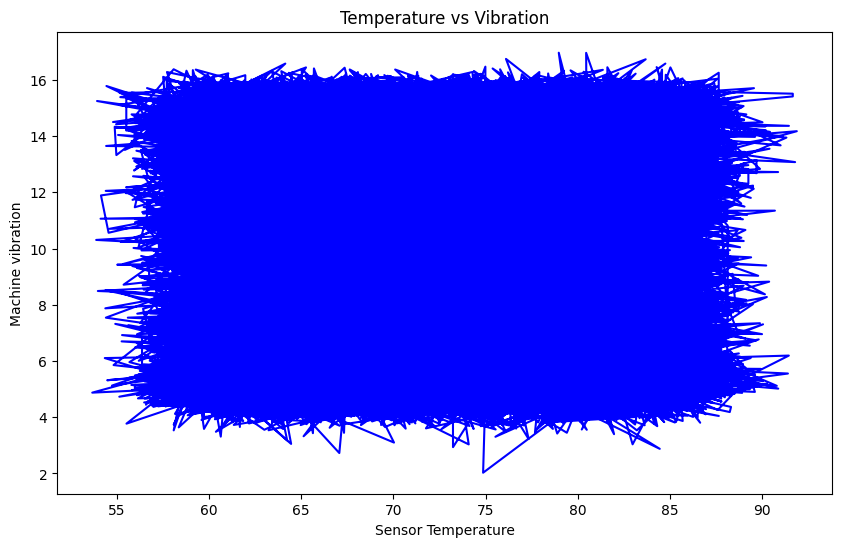

In [21]:
plt.figure(figsize=(10, 6)) 
plt.plot(machine_data['sensor_temp_c'], machine_data['vibration_mm_s'], color='blue')
plt.xlabel('Sensor Temperature')
plt.ylabel("Machine vibration")
plt.title('Temperature vs Vibration')

In [22]:
# 1. Ensure the column is a datetime object
machine_data['timestamp'] = pd.to_datetime(machine_data['timestamp'])


# 2. Create a new 'date' column
machine_data['date_col'] = machine_data['timestamp'].dt.date

# 3. Create a new 'time' column
machine_data['time_col'] = machine_data['timestamp'].dt.time

In [23]:
machine_data.head()

,timestamp,machine_id,sensor_temp_c,vibration_mm_s,status_code,date_col,time_col
0,2025-01-01 00:00:00,MILL_CRUSHER_01,64.168495,10.652147,Running,2025-01-01,00:00:00
1,2025-01-01 00:05:00,MILL_CRUSHER_01,59.834133,9.566729,Running,2025-01-01,00:05:00
2,2025-01-01 00:10:00,MILL_CRUSHER_01,59.281779,10.375491,Running,2025-01-01,00:10:00
3,2025-01-01 00:15:00,MILL_CRUSHER_01,62.957002,10.769664,Running,2025-01-01,00:15:00
4,2025-01-01 00:20:00,MILL_CRUSHER_01,61.440107,9.927583,Running,2025-01-01,00:20:00


Text(0.5, 1.0, 'Temperature trend')

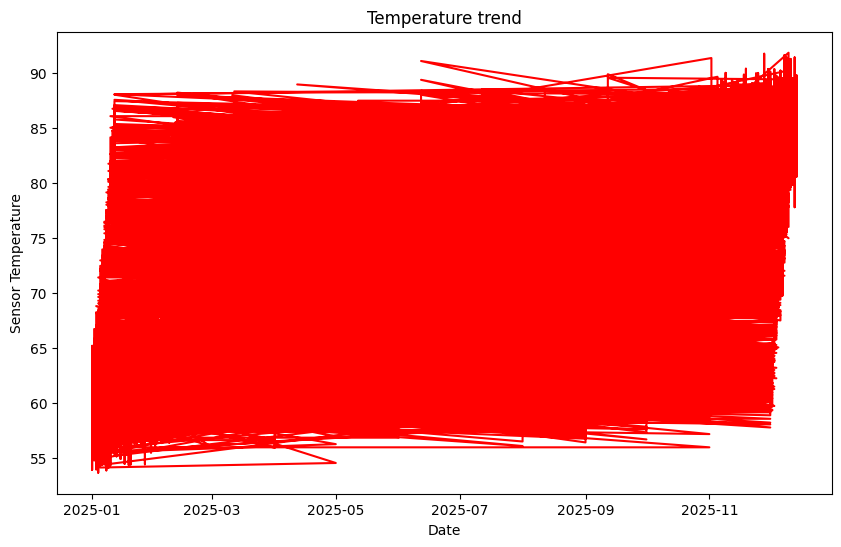

In [27]:
plt.figure(figsize=(10, 6)) 
plt.plot(machine_data['date_col'], machine_data['sensor_temp_c'], color='red')
plt.xlabel('Date')
plt.ylabel("Sensor Temperature")
plt.title('Temperature trend')

Text(0.5, 1.0, 'Vibration trend')

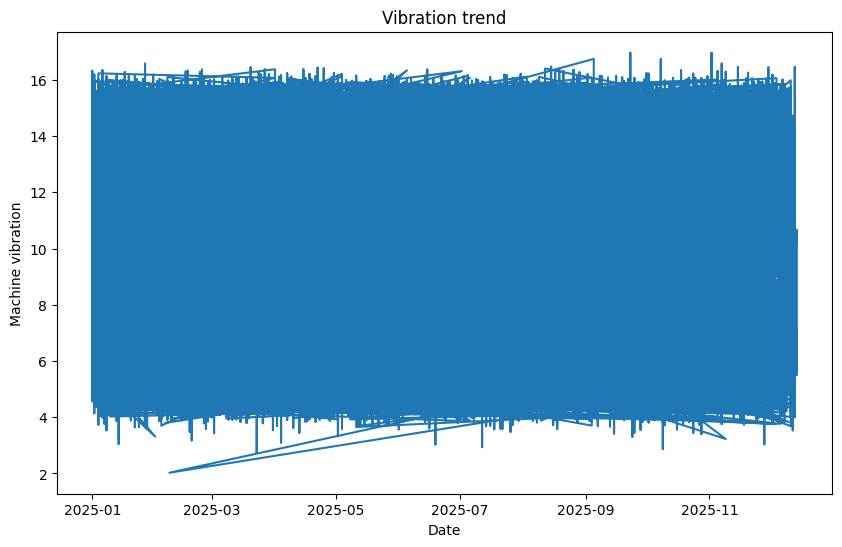

In [28]:
plt.figure(figsize=(10, 6)) 
plt.plot(machine_data['date_col'], machine_data['vibration_mm_s'])
plt.xlabel('Date')
plt.ylabel("Machine vibration")
plt.title('Vibration trend')